<a href="https://colab.research.google.com/github/YumnaZai/ML-Projects/blob/main/Linear_Regression%20-%20Predicting%20student%20score/petrol%20cunsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Simple Linear Regression

###Task : Predict student score given the number of hours spent by the student for studies
###Input: Hours studies
###Output: Score

In [19]:
import pandas as pd

In [20]:
df = pd.read_csv("w1_student_scores.csv")

In [21]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## The visual representation of data for better understanding

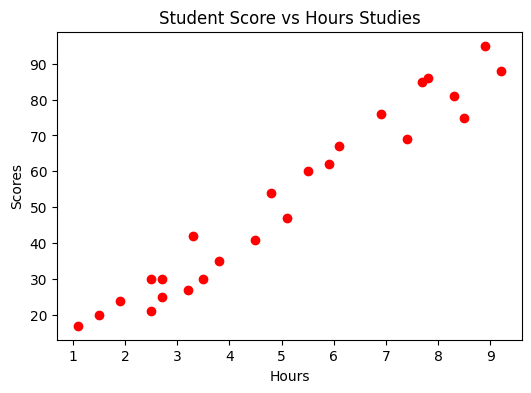

In [22]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(df['Hours'], df['Scores'], 'ro')
plt.title('Student Score vs Hours Studies')
plt.xlabel('Hours')
plt.ylabel('Scores')

plt.show()

##Find Coefficients
- 1. Calculate the mean of input and output
- 2. Calculate the slope with the standard equation
  - slope = df['xycov'].sum() / df['xvar'].sum()
  - df['xvar'] = (df['Hours'] - xmean)**2
  - df['xycov'] = (df['Hours'] - xmean) * (df['Scores'] - ymean)
- 3. Calculate the intercept with the standard equation
  - intercept = ymean - (slope * xmean)


## Calculate the mean of input and output


In [23]:
# Clculate the mean of x and y
import numpy as np
xmean = np.mean(df['Hours'])
ymean = np.mean(df['Scores'])


## Calculate the terms needed for the numarator and denominator of beta

In [24]:
# Calculate the difference between actual (x, y) - mean(x,y)
df['xycov'] = (df['Hours'] - xmean) * (df['Scores'] - ymean)
# Take the square of the answer
df['xvar'] = (df['Hours'] - xmean)**2


## Calculate the coefficients

In [25]:
slope = df['xycov'].sum() / df['xvar'].sum()
intercept = ymean - (slope * xmean)
print(f'slope = {slope}')
print(f'intercept = {intercept}')

slope = 9.775803390787473
intercept = 2.4836734053731817


**Model Equation**

In [26]:
# The regression model equation
Score_predicted = intercept + slope*df['Hours']

#Making Prediction

#### Compile the score of a student who studied for 7 hours

In [27]:
intercept + slope*7

np.float64(70.9142971408855)

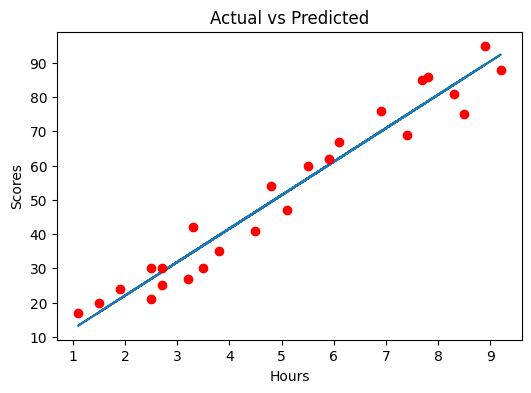

In [28]:
plt.figure(figsize=(6,4))
plt.plot(df['Hours'], Score_predicted) # regression line
plt.plot(df['Hours'], df['Scores'], 'ro') # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')

plt.show()

#1. Multiple Linear Regression

###Task : Predict petrol cunsumption of a country given various factors such as tax, distance of highways and poplution with driving licence
###Input: Tax,distance of highways, average income and population with driving license
###Output: Expected petrol consumption

In [29]:
df = pd.read_csv("w1_petrol_consumption.csv")

In [30]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [31]:
df.shape

(48, 5)

In [32]:
df.describe().round(2).T #T - transformation(easily readable)

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.67,0.95,5.00,7.00,7.50,8.12,10.00
Average_income,48.0,4241.83,573.62,3063.00,3739.00,4298.00,4578.75,5342.00
Paved_Highways,48.0,5565.42,3491.51,431.00,3110.25,4735.50,7156.00,17782.00
Population_Driver_licence(%),48.0,0.57,0.06,0.45,0.53,0.56,0.60,0.72
Petrol_Consumption,48.0,576.77,111.89,344.00,509.50,568.50,632.75,968.00


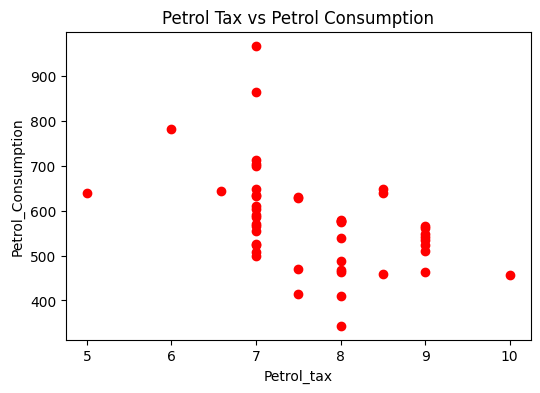

In [33]:
# Petrol Tax vs Petrol Consumption'
plt.figure(figsize=(6,4))
plt.plot(df['Petrol_tax'], df['Petrol_Consumption'], 'ro')
plt.title('Petrol Tax vs Petrol Consumption')
plt.xlabel('Petrol_tax')
plt.ylabel('Petrol_Consumption')

plt.show()

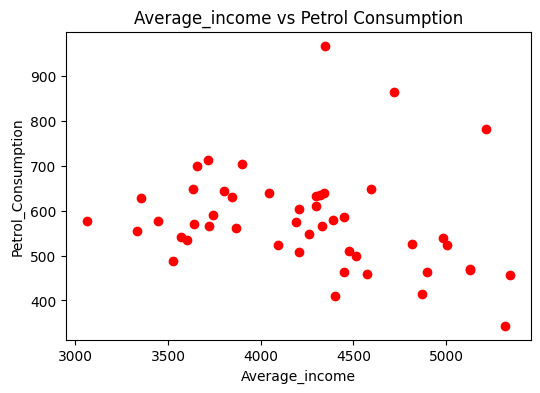

In [34]:
# Average Income vs Petrol Consumption
plt.figure(figsize=(6,4))
plt.plot(df['Average_income'], df['Petrol_Consumption'], 'ro')
plt.title('Average_income vs Petrol Consumption')
plt.xlabel('Average_income')
plt.ylabel('Petrol_Consumption')

plt.show()

# Train the Model

In [35]:
# Dive the independent and dependent variables
Y = df['Petrol_Consumption']
X = df[['Average_income','Paved_Highways','Population_Driver_licence(%)','Petrol_tax']]


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# random_state=42 - to avoid shufling


In [37]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [38]:
regressor.intercept_

np.float64(361.45087906668397)

In [39]:
regressor.coef_

array([-5.65355145e-02, -4.38217137e-03,  1.34686930e+03, -3.69937459e+01])

# Make Predictions

In [40]:
Y_pred = regressor.predict(X_test)


In [42]:
results = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
print(results)

    Actual   Predicted
27     631  606.692665
40     587  673.779442
26     577  584.991490
43     591  563.536910
24     460  519.058672
37     704  643.461003
12     525  572.897614
19     640  687.077036
4      410  547.609366
25     566  530.037630


# Evaluating The Model

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(Y_test, Y_pred)
MSE = mean_squared_error(Y_test, Y_pred)
RMSE = np.sqrt(MSE)

print(f"Mean Absolute Error: {MAE:.2f}")
print(f"Mean Squared Error: {MSE:.2f}")
print(f"Root Mean Squared Error: {RMSE:.2f}")

Mean Absolute Error: 53.47
Mean Squared Error: 4083.26
Root Mean Squared Error: 63.90


In [44]:
regressor.score(X_test, Y_test) # R2 SCORE

0.39136640014305457

In [45]:
regressor.score(X_train, Y_train)

0.7068781342155135

###Possible improvements
- Increase size odn the data
- Try non-linear relation
- May require more fetures